For an e-commerce scenario, this dataset was RANDOMLY created to imitate customer data. It can be used for a variety of analysis and insights, including evaluating the distribution of client demographics, examining buying trends across various product categories, and examining the correlation between age, income, and purchase volume. For tasks like consumer segmentation, recommendation systems, or predictive analytics in the e-commerce area, the dataset can also be utilized to train and test machine learning models.

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate random values for the dataset
n_customers = 500

customer_ids = range(1, n_customers + 1)
genders = np.random.choice(['Male', 'Female'], size=n_customers)
ages = np.random.randint(18, 65, size=n_customers)
incomes = np.random.normal(50000, 15000, size=n_customers)
cities = np.random.choice(['City A', 'City B', 'City C'], size=n_customers)
product_categories = np.random.choice(['Electronics', 'Clothing', 'Home & Kitchen','Furniture'], size=n_customers)
purchase_amounts = np.random.uniform(10, 200, size=n_customers)
purchase_amounts =np.round(purchase_amounts,decimals=0)
incomes = np.round(incomes,decimals=2)

# Create the DataFrame
df = pd.DataFrame({
    'CustomerID': customer_ids,
    'Gender': genders,
    'Age': ages,
    'Income': incomes,
    'City': cities,
    'Product Category': product_categories,
    'Purchase Amount': purchase_amounts
})

# Save the DataFrame as a CSV file
df.to_csv('ecommerce_data.csv', index=False)


Read CSV into DataFrame.
Convert DataFrame to NumPy array.

In [3]:
df = pd.read_csv("ecommerce_data.csv")
data = df.to_numpy()

Display DataFrame information.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        500 non-null    int64  
 1   Gender            500 non-null    object 
 2   Age               500 non-null    int64  
 3   Income            500 non-null    float64
 4   City              500 non-null    object 
 5   Product Category  500 non-null    object 
 6   Purchase Amount   500 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


Display the DataFrame.

In [7]:
df

,CustomerID,Gender,Age,Income,City,Product Category,Purchase Amount
0,1,Male,38,17812.15,City A,Home & Kitchen,81.0
1,2,Female,49,57694.12,City A,Home & Kitchen,115.0
2,3,Male,40,31722.66,City A,Furniture,84.0
3,4,Male,50,32595.12,City B,Furniture,41.0
4,5,Male,20,49375.61,City B,Clothing,62.0
...,...,...,...,...,...,...,...
495,496,Male,59,43034.13,City B,Furniture,162.0
496,497,Male,39,30103.18,City A,Clothing,136.0
497,498,Female,38,67318.76,City C,Home & Kitchen,28.0
498,499,Male,23,28198.60,City A,Electronics,123.0


Display column names.

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'City', 'Product Category',
       'Purchase Amount'],
      dtype='object')

Generate descriptive statistics of DataFrame.

In [12]:
df.describe()

,CustomerID,Age,Income,Purchase Amount
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,40.730000,51353.951660,104.164000
std,144.481833,13.282543,16073.415548,55.688882
min,1.000000,18.000000,8230.470000,10.000000
25%,125.750000,29.000000,40462.450000,54.000000
50%,250.500000,41.000000,50837.860000,104.000000
75%,375.250000,52.000000,62105.370000,152.000000
max,500.000000,64.000000,97510.580000,199.000000


Assigning specific columns from the data array to separate variables.

In [5]:
CustomerIDS = data[:,0]
Genders = data[:,1]
Ages= data[:,2]
Incomes =data[:,3]
Cities = data[:,4]
Product_Categories = data[:,5]
Purchase_Amounts = data[:,6]

Grouping the DataFrame by:

In [51]:
aggregates = df.groupby("City").agg({'Purchase Amount':'mean'})
print(aggregates)

        Purchase Amount
City                   
City A       104.823450
City B       106.996193
City C       100.156405


VISUALIZATION

Histogram of age distribution

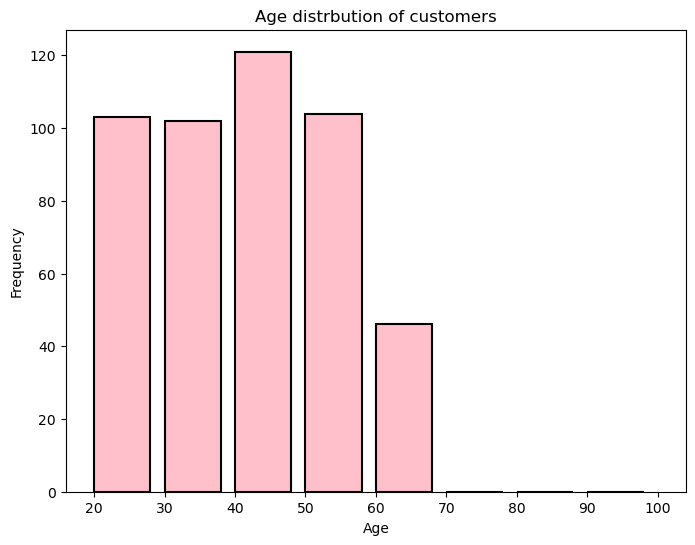

In [55]:

bin_edges = [20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize=(8, 6))
plt.hist(df["Age"], bins=bin_edges, edgecolor='black', linewidth=1.5, align='mid', color='pink', width=8)
plt.xticks(bin_edges)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution of customers")
plt.show()



scatter plot of age vs. income

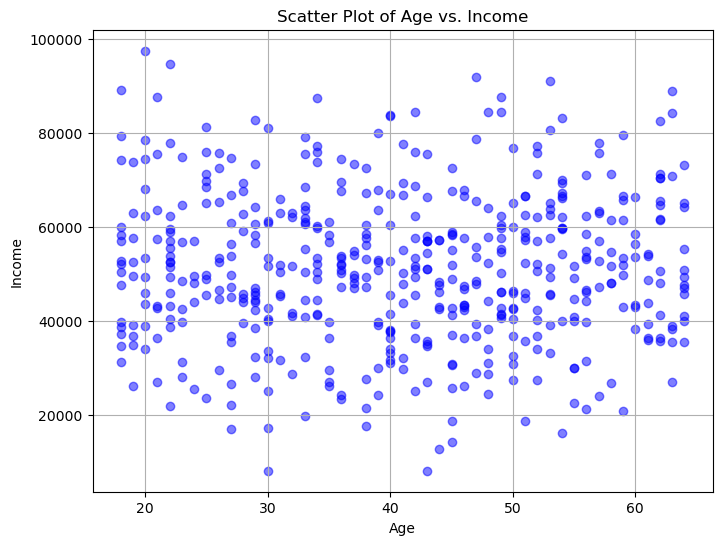

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income')
plt.grid(True)
plt.show()


Bar plot of product category distribution

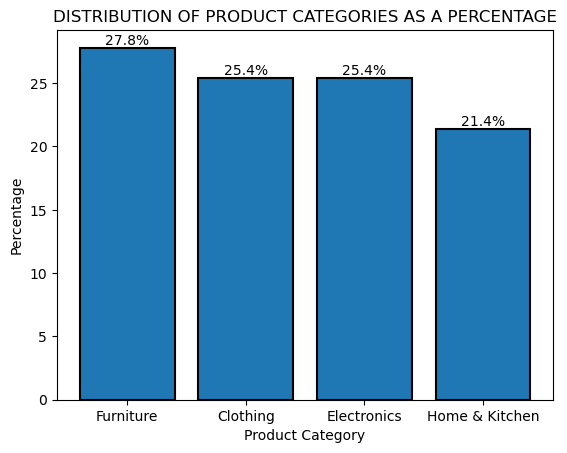

In [29]:
category_counts = df['Product Category'].value_counts()
category_percentages = category_counts / category_counts.sum() * 100

plt.bar(category_percentages.index, category_percentages.values, edgecolor='black', linewidth=1.5)
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.title('Distribution of product categories as a percentage')


for i, v in enumerate(category_percentages.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()




Violin plot of purchase amounts by product category

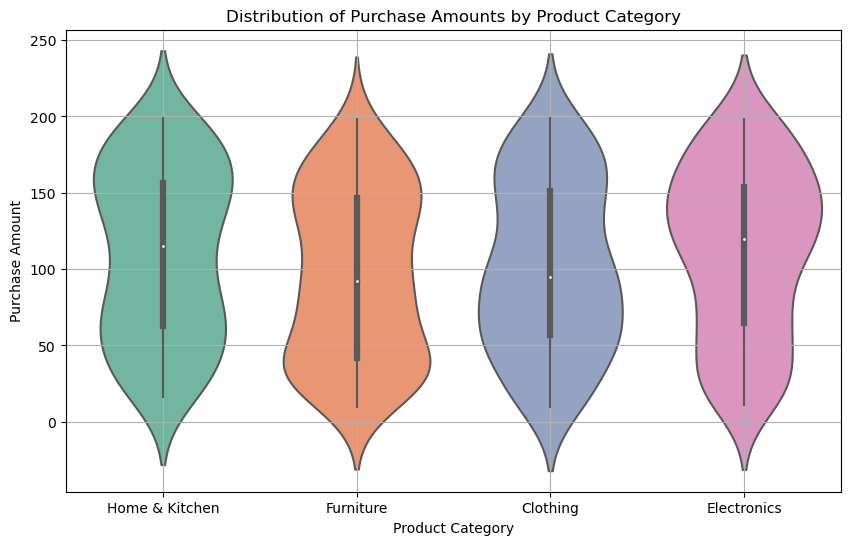

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product Category', y='Purchase Amount', data=df, palette='Set2')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.title('Distribution of Purchase Amounts by Product Category')
plt.grid(True)
plt.show()


In [95]:
category_count = df["Product Category"].value_counts()
print(category_count)

Furniture         139
Clothing          127
Electronics       127
Home & Kitchen    107
Name: Product Category, dtype: int64


Box plot of purchase amounts by product category

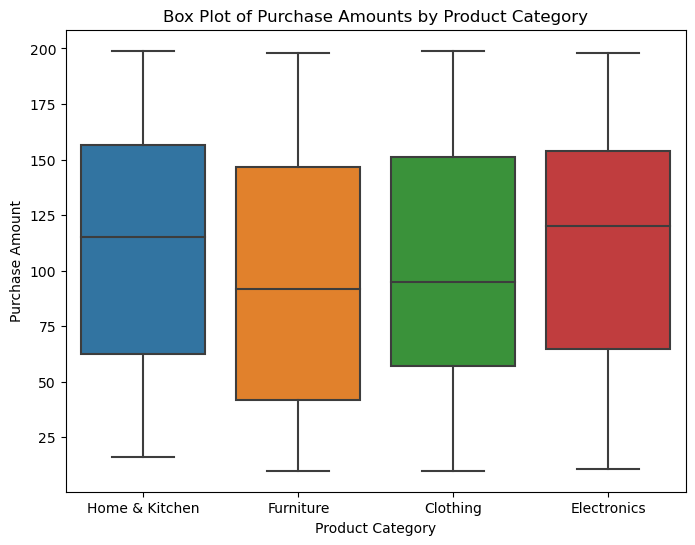

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product Category', y='Purchase Amount', data=df)
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.title('Box Plot of Purchase Amounts by Product Category')
plt.show()


Pivot table showing average purchase amounts by gender, age group, and product category

In [44]:
age = pd.cut(df['Age'],bins=[10, 20, 30, 40, 50, 60, 70])
df.pivot_table('Purchase Amount',['Gender',age],'Product Category')

Product Category    Clothing  Electronics   Furniture  Home & Kitchen
Gender Age                                                           
Female (10, 20]    98.000000    91.000000  101.750000       98.500000
       (20, 30]   100.250000   112.571429   88.583333      111.454545
       (30, 40]   114.333333   114.571429   84.727273      124.428571
       (40, 50]   133.142857   121.000000   84.117647      102.769231
       (50, 60]    73.000000   105.583333  104.133333      103.857143
       (60, 70]   109.666667   129.200000   91.000000      174.333333
Male   (10, 20]    66.428571    94.333333  115.666667       86.333333
       (20, 30]   108.800000    84.000000  102.888889       87.111111
       (30, 40]    97.857143   133.812500   93.416667       88.666667
       (40, 50]    70.000000   102.062500   89.363636      116.900000
       (50, 60]   110.600000   124.250000  105.266667      143.727273
       (60, 70]    82.200000   160.000000  122.750000       89.000000

Pivot table showing the sum of purchase amounts by product category and gender, with grand total

In [53]:
pivot_table = pd.pivot_table(df, values='Purchase Amount', index='Product Category', columns='Gender', aggfunc='sum', margins=True, margins_name='Grand Total')

print(pivot_table)


Gender             Female     Male  Grand Total
Product Category                               
Clothing           7161.0   5692.0      12853.0
Electronics        7606.0   6547.0      14153.0
Furniture          5940.0   7356.0      13296.0
Home & Kitchen     6478.0   5302.0      11780.0
Grand Total       27185.0  24897.0      52082.0


Bar plot showing the sum of purchase amounts by age group, with male and female percentages

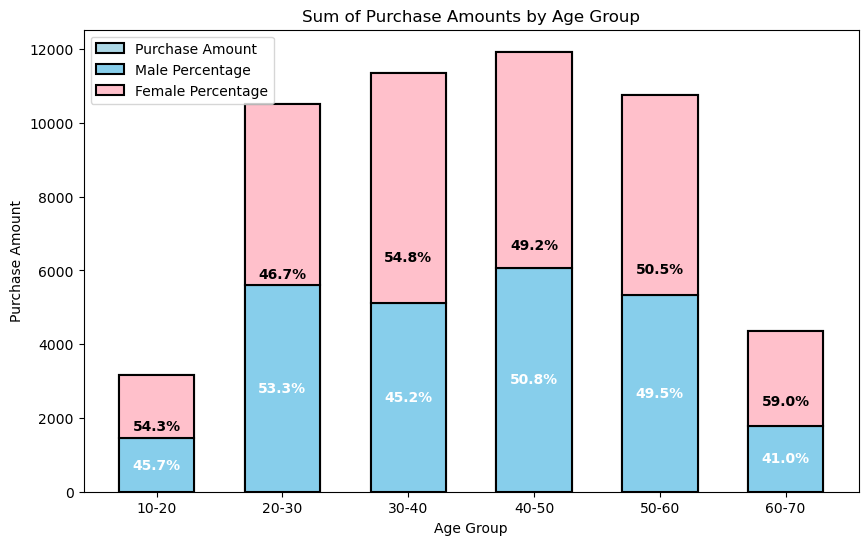

In [45]:
grouped_df = df.groupby(['Age Group', 'Gender']).size().unstack()
grouped_df['Total'] = grouped_df.sum(axis=1)
grouped_df['Male Percentage'] = grouped_df['Male'] / grouped_df['Total']
grouped_df['Female Percentage'] = grouped_df['Female'] / grouped_df['Total']

purchase_sums = df.groupby('Age Group')['Purchase Amount'].sum()

plt.figure(figsize=(10, 6))
bar_width = 0.6

age_groups = grouped_df.index
male_percentages = grouped_df['Male Percentage']
female_percentages = grouped_df['Female Percentage']
purchase_sums = purchase_sums.values

plt.bar(age_groups, purchase_sums, width=bar_width, color='lightblue', edgecolor='black', linewidth=1.5, label='Purchase Amount')
plt.bar(age_groups, male_percentages * purchase_sums, width=bar_width, color='skyblue', edgecolor='black', linewidth=1.5, label='Male Percentage')
plt.bar(age_groups, female_percentages * purchase_sums, width=bar_width, bottom=male_percentages * purchase_sums, color='pink', edgecolor='black', linewidth=1.5, label='Female Percentage')

for age_group, purchase_sum, male_percentage, female_percentage in zip(age_groups, purchase_sums, male_percentages, female_percentages):
    male_y = male_percentage * purchase_sum / 2
    female_y = male_y + female_percentage * purchase_sum / 2

    plt.text(age_group, male_y, f"{male_percentage:.1%}", ha='center', va='center', color='white', weight='bold')
    plt.text(age_group, female_y + 0.06 * purchase_sum, f"{female_percentage:.1%}", ha='center', va='center', color='black', weight='bold')

plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.title('Sum of Purchase Amounts by Age Group')
plt.legend()

plt.show()
